In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import figure
import matplotlib

%matplotlib inline  
#做圖顯示在jupyter notebook上
plt.style.use('ggplot') #作圖風格
#[f.name for f in matplotlib.font_manager.fontManager.ttflist] #查看有哪些字體
#matplotlib.font_manager._rebuild() #重新抓字體，下載完後
plt.rcParams['font.family'] = 'SimHei' #顯示中文
plt.rcParams['axes.unicode_minus']=False#顯示負號

pd.set_option("display.max_columns",50)#設定pandas最多顯示50

In [3]:
df = pd.read_csv('A_LVR_LAND_A.csv', encoding='big5')

In [4]:
df.sample(5)#隨機取5筆資料

,鄉鎮市區,交易標的,土地區段位置或建物區門牌,土地移轉總面積平方公尺,都市土地使用分區,非都市土地使用分區,非都市土地使用編定,交易年月日,交易筆棟數,移轉層次,總樓層數,建物型態,主要用途,主要建材,建築完成年月,建物移轉總面積平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,建物現況格局-隔間,有無管理組織,總價元,單價每平方公尺,車位類別,車位移轉總面積平方公尺,車位總價元,備註,編號
174,文山區,房地(土地+建物)+車位,臺北市文山區興隆路四段29巷4弄1~30號,48.11,住,NaN,NaN,1060418,土地2建物1車位1,三層,十一層,住宅大樓(11層含以上有電梯),住家用,鋼筋混凝土造,871202.0,106.46,2,2,2,有,有,16680000,156679.0,坡道機械,14.77,0,含增建或未登記建物。,RPXNMLNJOHMFFAA08CA
664,萬華區,房地(土地+建物)+車位,臺北市萬華區萬青街181~210號,32.54,住,NaN,NaN,1060417,土地1建物1車位2,三層,十二層,住宅大樓(11層含以上有電梯),住家用,鋼筋混凝土造,931028.0,178.26,3,1,2,有,有,25000000,140252.0,坡道平面,0.00,0,親友、員工或其他特殊關係間之交易。,RPPNMLNJPHMFFBA47CA
628,大安區,房地(土地+建物),臺北市大安區仁愛路四段71巷1~30號,15.23,住,NaN,NaN,1060524,土地1建物1車位0,一層，地下層,六層,華廈(10層含以下有電梯),住家用,鋼筋混凝土造,NaN,148.19,0,0,0,無,無,9035845,60975.0,NaN,0.00,0,親友、員工或其他特殊關係間之交易。,RPPOMLKMOHMFFFA87CA
5,內湖區,房地(土地+建物),臺北市內湖區舊宗路一段31~60號,15.12,商,NaN,NaN,1050724,土地1建物1車位0,四層,五層,華廈(10層含以下有電梯),商業用,鋼筋混凝土造,920910.0,47.74,2,2,2,有,有,12280000,257227.0,NaN,0.00,0,含增建或未登記建物。,RPOQMLOKRHLFFCA18DA
714,信義區,房地(土地+建物),臺北市信義區吳興街494巷1~30號,23.69,住,NaN,NaN,1060509,土地1建物1車位0,五層,七層,華廈(10層含以下有電梯),住家用,鋼筋混凝土造,780815.0,119.87,3,2,2,有,有,20700000,172687.0,NaN,0.00,0,NaN,RPSNMLTKOHMFFDA58CA


資料預處理

In [5]:
df.groupby('交易標的').mean()

,土地移轉總面積平方公尺,非都市土地使用分區,非都市土地使用編定,交易年月日,建築完成年月,建物移轉總面積平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,總價元,單價每平方公尺,車位移轉總面積平方公尺,車位總價元
交易標的,,,,,,,,,,,,,
土地,215.995593,NaN,NaN,1.059181e+06,NaN,0.000000,0.000000,0.000000,0.000000,7.343879e+06,123041.372881,0.000000,0.000000e+00
建物,0.000000,NaN,NaN,1.054469e+06,941057.222222,80.709000,1.000000,0.600000,1.100000,5.636200e+06,82164.800000,0.000000,0.000000e+00
房地(土地+建物),22.567617,NaN,NaN,1.059772e+06,765348.258373,86.596289,2.189453,1.447266,1.380859,1.472509e+07,166718.550781,0.000000,0.000000e+00
房地(土地+建物)+車位,36.521667,NaN,NaN,1.058768e+06,967275.413953,228.741806,2.430556,1.504630,1.597222,4.283112e+07,191406.018605,34.382361,1.393102e+06
車位,2.486136,NaN,NaN,1.060058e+06,908492.702703,41.700682,0.000000,0.000000,0.000000,2.502386e+06,NaN,30.595227,2.368295e+06


In [6]:
#去除土地及車位資料
df = df[(df['交易標的'] != '土地') & (df['交易標的'] != '車位')].reset_index(drop=True)#刪除空掉的index

In [7]:
df.loc[:,'總價元'] = df.loc[:,'總價元']/10000 #改萬為單位

In [8]:
df.groupby('交易標的').mean()

,土地移轉總面積平方公尺,非都市土地使用分區,非都市土地使用編定,交易年月日,建築完成年月,建物移轉總面積平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,總價元,單價每平方公尺,車位移轉總面積平方公尺,車位總價元
交易標的,,,,,,,,,,,,,
建物,0.000000,NaN,NaN,1.054469e+06,941057.222222,80.709000,1.000000,0.600000,1.100000,563.620000,82164.800000,0.000000,0.000000e+00
房地(土地+建物),22.567617,NaN,NaN,1.059772e+06,765348.258373,86.596289,2.189453,1.447266,1.380859,1472.509301,166718.550781,0.000000,0.000000e+00
房地(土地+建物)+車位,36.521667,NaN,NaN,1.058768e+06,967275.413953,228.741806,2.430556,1.504630,1.597222,4283.111866,191406.018605,34.382361,1.393102e+06


In [9]:
print(df.loc[0,'交易年月日'])
print(type(df.loc[0,'交易年月日']))

1040303
<class 'numpy.int64'>


In [10]:
for i in range(len(df)): #len(df):df資料筆數
    df.loc[i,'交易年'] = int(df.loc[i,'交易年月日']/10000) #int()取整數

In [11]:
print(df.loc[0,'建築完成年月'])
print(type(df.loc[0,'建築完成年月']))

831111.0
<class 'numpy.float64'>


In [12]:
from datetime import datetime
now = datetime.now() #(年,月,日,時,分,秒,微秒(microseconds))
now.year

2019

In [13]:
for i in range(len(df)):
    df.loc[i,'建築完成年'] = round(df.loc[i,'建築完成年月']/10000)#round4捨5入取整數
    df.loc[i,'屋齡'] = now.year - 1911 - round(df.loc[i,'建築完成年月']/10000)

In [15]:
df.sample(10)

,鄉鎮市區,交易標的,土地區段位置或建物區門牌,土地移轉總面積平方公尺,都市土地使用分區,非都市土地使用分區,非都市土地使用編定,交易年月日,交易筆棟數,移轉層次,總樓層數,建物型態,主要用途,主要建材,建築完成年月,建物移轉總面積平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,建物現況格局-隔間,有無管理組織,總價元,單價每平方公尺,車位類別,車位移轉總面積平方公尺,車位總價元,備註,編號,交易年,建築完成年,屋齡
386,文山區,房地(土地+建物)+車位,臺北市文山區三福街61~90號,27.68,住,NaN,NaN,1060515,土地1建物1車位1,十一層,十五層,住宅大樓(11層含以上有電梯),住家用,鋼筋混凝土造,1030127.0,245.95,3,2,2,有,有,3850.0,182163.0,坡道平面,45.58,2000000,NaN,RPQNMLSLOHMFFAA08CA,106.0,103.0,5.0
637,內湖區,房地(土地+建物)+車位,臺北市內湖區民權東路六段241~270號,39.54,商,NaN,NaN,1060325,土地4建物4車位7,一層,八層,店面(店鋪),商業用,鋼筋混凝土造,971128.0,221.09,0,0,0,無,有,6850.0,309829.0,升降機械,0.00,0,NaN,RPPNMLOKPHMFFCA77CA,106.0,97.0,11.0
440,文山區,房地(土地+建物),臺北市文山區木柵路四段9巷31~60號,131.54,住,NaN,NaN,1060410,土地2建物1車位0,一層,四層,華廈(10層含以下有電梯),住家用,鋼筋混凝土造,870815.0,173.35,3,2,2,有,有,2280.0,131526.0,NaN,0.00,0,含增建或未登記建物。本棟有電梯。本戶有車位使用權。,RPPNMLNKOHMFFAA37CA,106.0,87.0,21.0
515,文山區,房地(土地+建物),臺北市文山區景華街82巷7弄1~30號,7.57,住,NaN,NaN,1060525,土地1建物1車位0,五層,五層,公寓(5樓含以下無電梯),住家用,鋼筋混凝土造,NaN,26.88,2,2,1,有,無,132.0,49107.0,NaN,0.00,0,親友、員工或其他特殊關係間之交易。,RPSNMLTJOHMFFAA18CA,106.0,NaN,NaN
549,大安區,房地(土地+建物),臺北市大安區仁愛路四段122巷61~90號,8.15,商,NaN,NaN,1060508,土地2建物1車位0,四層,十四層,住宅大樓(11層含以上有電梯),住家用,鋼筋混凝土造,720816.0,84.35,2,2,1,有,有,2210.0,262004.0,NaN,0.00,0,含增建或未登記建物。,RPSNMLTJOHMFFFA68CA,106.0,72.0,36.0
532,信義區,房地(土地+建物),臺北市信義區忠孝東路五段451~480號,12.63,商,NaN,NaN,1060409,土地3建物1車位0,十一層,十一層,住宅大樓(11層含以上有電梯),見其他登記事項,鋼筋混凝土造,941006.0,73.87,2,1,2,有,有,2698.0,365236.0,NaN,0.00,0,含增建或未登記建物。,RPVPMLNKOHMFFDA58DA,106.0,94.0,14.0
13,內湖區,房地(土地+建物),臺北市內湖區星雲街210巷31~60號,21.46,住,NaN,NaN,1050727,土地1建物1車位0,十二層,十四層,住宅大樓(11層含以上有電梯),住家用,鋼筋混凝土造,891101.0,94.37,2,2,2,有,有,1950.0,206633.0,NaN,0.00,0,NaN,RPUNMLKKRHLFFCA97CA,105.0,89.0,19.0
220,信義區,房地(土地+建物),臺北市信義區吳興街336巷1~30號,37.00,住,NaN,NaN,1060507,土地1建物1車位0,四層,四層,公寓(5樓含以下無電梯),住家用,加強磚造,NaN,86.00,3,2,1,有,無,1435.0,166860.0,NaN,0.00,0,NaN,RPTPMLNKOHMFFDA28CA,106.0,NaN,NaN
248,信義區,房地(土地+建物),臺北市信義區永吉路491巷7弄1~30號,24.00,住,NaN,NaN,1060523,土地1建物1車位0,一層，二層，三層,三層,店面(店鋪),NaN,加強磚造,720101.0,69.30,0,0,2,無,無,2060.0,297258.0,NaN,0.00,0,NaN,RPSOMLNJOHMFFDA97CA,106.0,72.0,36.0
574,信義區,房地(土地+建物),臺北市信義區和平東路三段391巷8弄1~30號,18.12,住,NaN,NaN,1060509,土地1建物1車位0,二層，陽台,四層,公寓(5樓含以下無電梯),住家用,鋼筋混凝土造,NaN,45.84,2,2,1,有,無,635.0,138525.0,NaN,0.00,0,含增建或未登記建物。,RPWPMLNKOHMFFDA68DA,106.0,NaN,NaN


# 資料探索

Text(0, 0.5, '資料筆數')

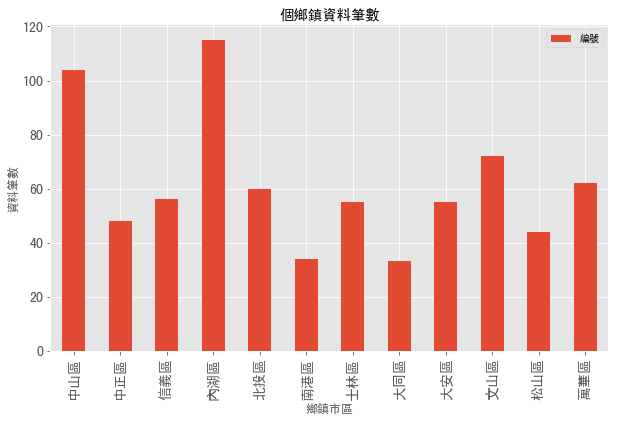

In [16]:
ax = df.groupby('鄉鎮市區').count().plot(kind='bar',y='編號',figsize=(10,6),fontsize=14,title='個鄉鎮資料筆數')
ax.set_ylabel('資料筆數')

In [16]:
corr = df[['總價元','土地移轉總面積平方公尺','建物移轉總面積平方公尺','建物現況格局-房','建物現況格局-廳','建物現況格局-衛','車位移轉總面積平方公尺','車位總價元','屋齡','建築完成年','交易年']].corr()
corr #相關係數

,總價元,土地移轉總面積平方公尺,建物移轉總面積平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,車位移轉總面積平方公尺,車位總價元,屋齡,建築完成年,交易年
總價元,1.000000,0.718356,0.897664,0.037094,-0.051536,0.062915,0.472775,0.517171,-0.351787,0.351787,-0.044518
土地移轉總面積平方公尺,0.718356,1.000000,0.837357,0.218130,0.107488,0.168725,0.236906,0.215380,-0.090268,0.090268,0.006141
建物移轉總面積平方公尺,0.897664,0.837357,1.000000,0.072909,-0.027742,0.056027,0.451150,0.384596,-0.303746,0.303746,-0.048933
建物現況格局-房,0.037094,0.218130,0.072909,1.000000,0.664950,0.761660,0.016739,-0.012425,0.101536,-0.101536,-0.032178
建物現況格局-廳,-0.051536,0.107488,-0.027742,0.664950,1.000000,0.547287,-0.049335,-0.076489,0.051712,-0.051712,-0.001068
建物現況格局-衛,0.062915,0.168725,0.056027,0.761660,0.547287,1.000000,0.009501,-0.009853,-0.025424,0.025424,-0.070500
車位移轉總面積平方公尺,0.472775,0.236906,0.451150,0.016739,-0.049335,0.009501,1.000000,0.741627,-0.462698,0.462698,-0.096084
車位總價元,0.517171,0.215380,0.384596,-0.012425,-0.076489,-0.009853,0.741627,1.000000,-0.357414,0.357414,-0.061319
屋齡,-0.351787,-0.090268,-0.303746,0.101536,0.051712,-0.025424,-0.462698,-0.357414,1.000000,-1.000000,0.142024
建築完成年,0.351787,0.090268,0.303746,-0.101536,-0.051712,0.025424,0.462698,0.357414,-1.000000,1.000000,-0.142024


In [6]:
df1 = pd.read_csv('hh.csv', encoding='utf-8')

In [9]:
corr = df1.corr()
corr #相關係數

,大立光,玉山金控,第一金控,合庫金,華南金,10000,10100,10150,10200,10250,10300,10350,10400,10450,10550,10500,10600,10650,11000,10800,10700
大立光,1.000000,0.208841,0.116974,0.890993,0.528547,0.681013,0.818950,0.843381,0.876514,0.820988,0.797847,0.811373,0.818337,0.824768,0.851432,0.829990,0.752209,0.846459,NaN,0.584994,0.695581
玉山金控,0.208841,1.000000,0.910182,-0.219299,-0.542326,-0.479850,-0.140590,-0.161535,-0.082725,-0.065875,0.034261,0.006561,0.056746,-0.002611,-0.033361,-0.020589,-0.152845,0.147770,NaN,-0.342997,0.504184
第一金控,0.116974,0.910182,1.000000,-0.332205,-0.645497,-0.597317,-0.269896,-0.234991,-0.152718,-0.048740,0.074466,0.059123,0.099278,0.040844,-0.006109,0.024506,-0.174012,0.201008,NaN,-0.102062,0.218218
合庫金,0.890993,-0.219299,-0.332205,1.000000,0.735215,0.878585,0.842300,0.857705,0.853698,0.751854,0.671120,0.696908,0.683405,0.718791,0.768860,0.733271,0.729730,0.672527,NaN,0.639362,0.497096
華南金,0.528547,-0.542326,-0.645497,0.735215,1.000000,0.968923,0.894779,0.877022,0.832731,0.771488,0.691254,0.691265,0.670254,0.704961,0.733453,0.711833,0.857750,0.583874,NaN,0.395285,0.422577
10000,0.681013,-0.479850,-0.597317,0.878585,0.968923,1.000000,0.923438,0.915019,0.880517,0.795941,0.706817,0.716914,0.696350,0.735120,0.775026,0.745767,0.850974,0.630342,NaN,0.502354,0.462133
10100,0.818950,-0.140590,-0.269896,0.842300,0.894779,0.923438,1.000000,0.989402,0.982460,0.926408,0.880329,0.876130,0.873388,0.888418,0.910124,0.890516,0.957066,0.830042,NaN,0.442942,0.713821
10150,0.843381,-0.161535,-0.234991,0.857705,0.877022,0.915019,0.989402,1.000000,0.996259,0.963988,0.922813,0.924967,0.918787,0.935395,0.954507,0.938926,0.975310,0.882436,NaN,0.562527,0.643322
10200,0.876514,-0.082725,-0.152718,0.853698,0.832731,0.880517,0.982460,0.996259,1.000000,0.973001,0.940445,0.942096,0.939271,0.951623,0.968245,0.954162,0.971949,0.912440,NaN,0.567273,0.674846
10250,0.820988,-0.065875,-0.048740,0.751854,0.771488,0.795941,0.926408,0.963988,0.973001,1.000000,0.990407,0.992226,0.988461,0.994905,0.996781,0.995361,0.983162,0.966714,NaN,0.639761,0.581274


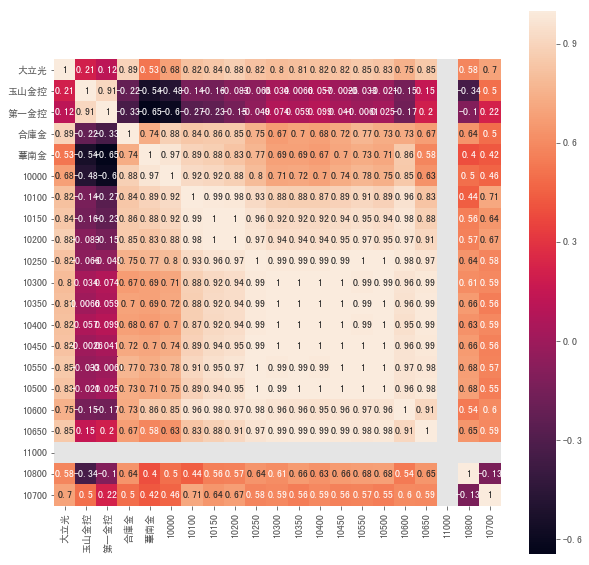

In [10]:
import seaborn as sns
plt.rcParams['font.family']='SimHei'
plt.figure(figsize=(10,10))
sns.heatmap(corr, square=True, annot=True)
plt.show()

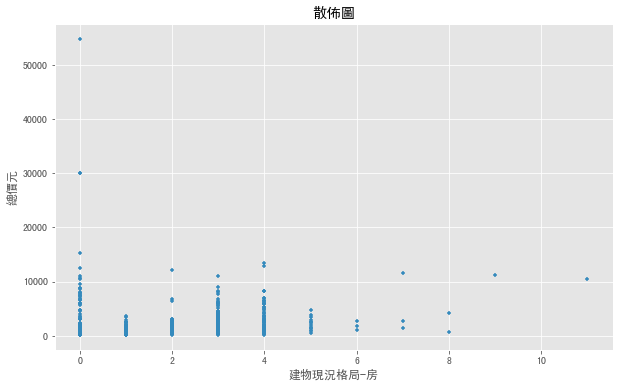

In [30]:
df.plot(kind='scatter' ,title='散佈圖' ,figsize=(10,6) ,x='建物現況格局-房' ,y='總價元' ,marker='+')

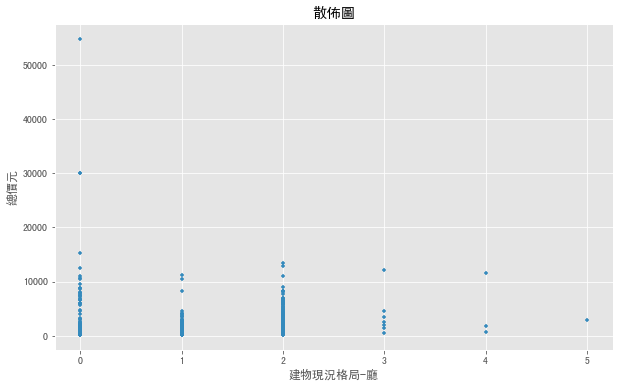

In [33]:
df.plot(kind='scatter' ,title='散佈圖' ,figsize=(10,6) ,x='建物現況格局-廳' ,y='總價元' ,marker='+')

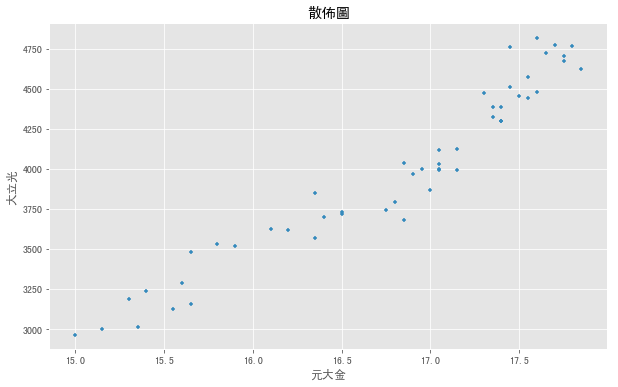

In [20]:
df1.plot(kind='scatter' ,title='散佈圖' ,figsize=(10,6) ,x='元大金' ,y='大立光' ,marker='+')

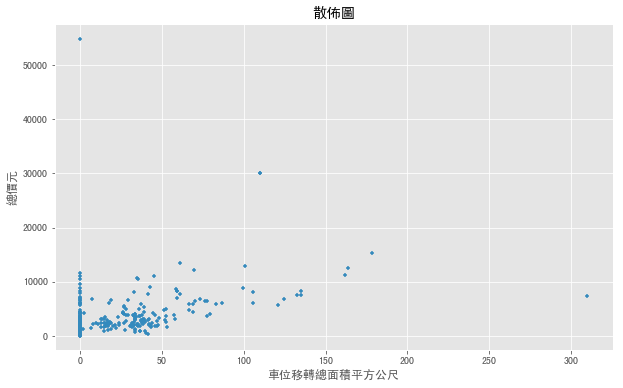

In [34]:
df.plot(kind='scatter' ,title='散佈圖' ,figsize=(10,6) ,x='車位移轉總面積平方公尺' ,y='總價元' ,marker='+')

 # 各鄉鎮比較

In [35]:
df2 = df[['鄉鎮市區','土地移轉總面積平方公尺','建物移轉總面積平方公尺','單價每平方公尺','建物現況格局-房','建物現況格局-廳','建物現況格局-衛','車位移轉總面積平方公尺','車位總價元','屋齡','建築完成年','交易年','總價元']]
df2.groupby('鄉鎮市區').mean()

,土地移轉總面積平方公尺,建物移轉總面積平方公尺,單價每平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,車位移轉總面積平方公尺,車位總價元,屋齡,建築完成年,交易年,總價元
鄉鎮市區,,,,,,,,,,,,
中山區,16.297692,105.000096,182520.461538,2.076923,1.375000,1.519231,7.903173,479519.230769,21.096774,85.903226,105.903846,2139.697917
中正區,17.749583,113.277500,203961.895833,1.708333,1.145833,1.187500,5.110417,277083.333333,23.743590,83.256410,105.833333,2477.166704
信義區,28.029821,127.634286,189706.750000,2.267857,1.428571,1.446429,8.865714,298214.285714,28.780488,78.219512,105.946429,2314.053964
內湖區,37.064609,182.183652,162547.035088,2.521739,1.530435,1.547826,17.334609,478695.652174,20.176991,86.823009,105.652174,2892.934783
北投區,28.839167,133.713000,142094.283333,2.050000,1.366667,1.350000,17.170833,734166.666667,20.016667,86.983333,105.866667,1960.550000
南港區,31.355000,156.041176,164861.647059,2.294118,1.529412,1.500000,15.133824,555882.352941,15.142857,91.857143,105.970588,2641.029412
士林區,33.232364,148.830000,179288.290909,2.309091,1.563636,1.545455,15.637818,938181.818182,29.109091,77.890909,106.000000,3244.573075
大同區,18.098182,108.097576,142900.272727,2.212121,1.454545,1.303030,7.021212,192424.242424,23.185185,83.814815,105.909091,1549.110000
大安區,22.519455,126.577636,247827.327273,2.163636,1.436364,1.400000,6.381818,252727.272727,24.722222,82.277778,106.000000,3099.045173


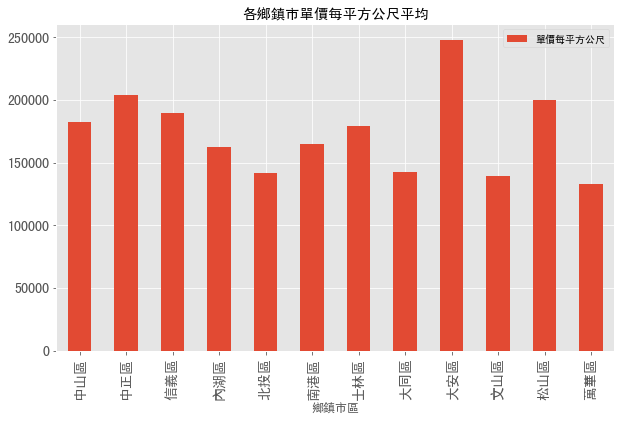

In [36]:
df2.groupby('鄉鎮市區').mean().plot(kind='bar',y='單價每平方公尺',figsize=(10,6),fontsize=14,title='各鄉鎮市單價每平方公尺平均')

# 四、資料預處理(二) - 機器學習

# 4.1 針對鄉鎮市區做one-hot encoding

In [38]:
df_region = pd.get_dummies(df['鄉鎮市區'])#取得one-hot encoding
df_region.head()

,中山區,中正區,信義區,內湖區,北投區,南港區,士林區,大同區,大安區,文山區,松山區,萬華區
0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0


In [39]:
df_ml = pd.merge(df2,df_region,left_index=True,right_index=True)#合併dataframe
df_ml.head()

,鄉鎮市區,土地移轉總面積平方公尺,建物移轉總面積平方公尺,單價每平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,車位移轉總面積平方公尺,車位總價元,屋齡,建築完成年,交易年,總價元,中山區,中正區,信義區,內湖區,北投區,南港區,士林區,大同區,大安區,文山區,松山區,萬華區
0,大同區,6.34,55.19,233738.0,1,1,1,0.00,0,24.0,83.0,104.0,1290.0,0,0,0,0,0,0,0,1,0,0,0,0
1,內湖區,4.96,38.79,110853.0,1,1,1,0.00,0,22.0,85.0,105.0,430.0,0,0,0,1,0,0,0,0,0,0,0,0
2,內湖區,13.72,149.24,160815.0,3,2,2,12.96,0,10.0,97.0,105.0,2400.0,0,0,0,1,0,0,0,0,0,0,0,0
3,內湖區,22.45,136.20,149046.0,3,2,1,34.60,0,10.0,97.0,105.0,2030.0,0,0,0,1,0,0,0,0,0,0,0,0
4,內湖區,33.51,242.78,197216.0,5,2,2,51.07,0,14.0,93.0,105.0,4788.0,0,0,0,1,0,0,0,0,0,0,0,0


## 4.2 去除遺失值和極端值

In [40]:
df_ml = df_ml.dropna().reset_index(drop=True)

In [41]:
df_ml = df_ml[df_ml['建物移轉總面積平方公尺']<1000]#超過1000代表不是一般正常房子

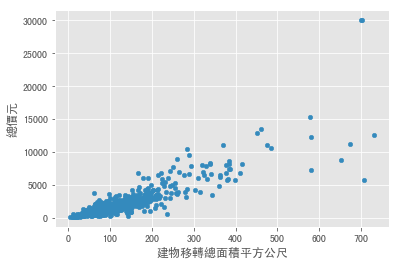

In [42]:
df_ml.plot(kind='scatter',x='建物移轉總面積平方公尺',y='總價元')

# 五、簡單線性迴歸

## 5.1 使用Scikit-Learn SGDRegressor
### 5.1.1 切分訓練及測試資料 (1 feature)  
##### PS: 這裡的測試資料可視為驗證資料集CV (最後的測試資料應另外保留)

In [43]:
from sklearn.model_selection import train_test_split

X = df_ml[['建物移轉總面積平方公尺']]
y = df_ml[['總價元']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) # 30% for testing, 70% for training
X_train.head()

,建物移轉總面積平方公尺
368,61.59
119,69.69
638,110.47
205,210.83
542,700.07


### 5.1.2 特徵標準化(Standardization)

In [48]:
from sklearn.preprocessing import StandardScaler #標準化
sc = StandardScaler()
sc.fit(X_train)
X_train_normalized = sc.transform(X_train)
X_test_normalized = sc.transform(X_test)

各變項參數: [2172.05563605]
MSE: 974405.40
R Square: 0.7673993092510527
截距:,sgdr.intercept_


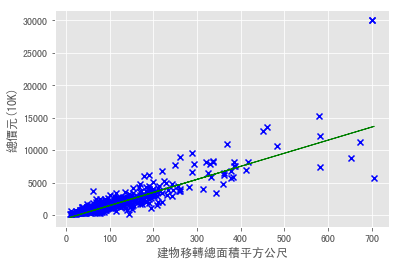

In [70]:
from sklearn import datasets, linear_model

#SGDRegressor的input y需要一維矩陣type
y_train_1d = y_train.values.ravel()
y_test_1d = y_test.values.ravel()

# linear regression 物件
sgdr = linear_model.SGDRegressor(max_iter=50,learning_rate='constant',eta0=0.0001)#max_iter學習次數,learning_rate學習方式

# 訓練模型
sgdr.fit(X_train_normalized, y_train_1d)

print('各變項參數:', sgdr.coef_)
print("MSE: %.2f" % np.mean((sgdr.predict(X_test_normalized) - y_test_1d) ** 2))
print("R Square:",sgdr.score(X_test_normalized,y_test))
print("截距:,sgdr.intercept_")

plt.scatter(X_train['建物移轉總面積平方公尺'], y_train_1d,  color='blue', marker = 'x')

plt.plot(X_train, sgdr.predict(X_train_normalized), color='green', linewidth=1)

plt.ylabel('總價元(10K)')
plt.xlabel('建物移轉總面積平方公尺')

plt.show()

In [71]:
# Scikit-Learn 官網作圖函式
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure(figsize=(10,6))  #調整作圖大小
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

Automatically created module for IPython interactive environment


<module 'matplotlib.pyplot' from '/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

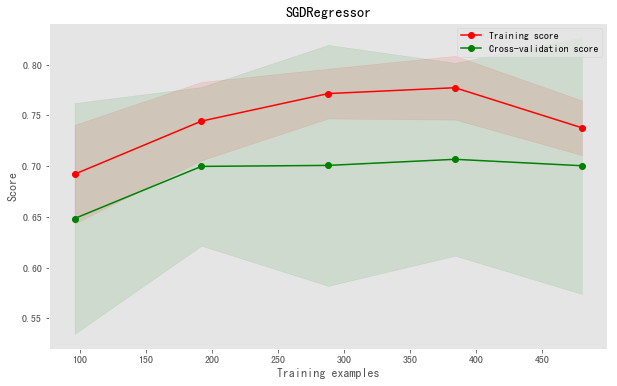

In [72]:
from sklearn.model_selection import KFold,StratifiedKFold

cv = KFold(n_splits=4, random_state=None, shuffle=True)#n_splits:KFold值月多值k要越大,random_state:每次都隨機,shuffle切資料=TRUE先打亂再切=False不打亂就切
estimator = linear_model.SGDRegressor(max_iter=1000,learning_rate='constant',eta0=0.01)

sc.fit(X_train)
plot_learning_curve(estimator, "SGDRegressor", sc.transform(X), y.values.ravel(), cv=cv, train_sizes=np.linspace(0.2, 1.0, 5))#linspace:20%-100%分成五個資料點

## 5.2 使用Scikit-Learn LinearRegression

各變項參數: [[2430.66163946]]
MSE: 974195.74
R Square: 0.7674493561752141


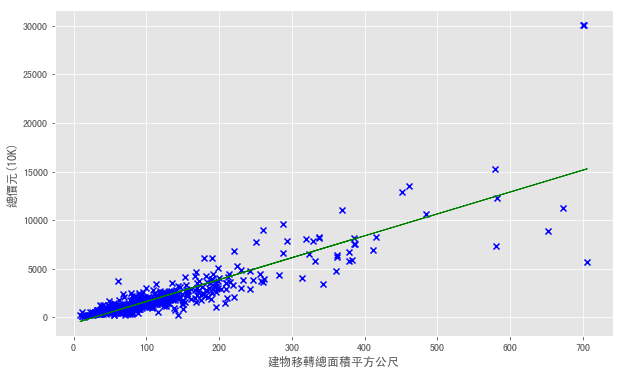

In [73]:
# linear regression
regr = linear_model.LinearRegression()

# 訓練模型
regr.fit(X_train_normalized, y_train)

print('各變項參數:', regr.coef_)
print("MSE: %.2f" % np.mean((regr.predict(X_test_normalized) - y_test) ** 2))
print("R Square:",regr.score(X_test_normalized,y_test))

plt.figure(figsize=(10,6))  #調整作圖大小
plt.scatter(X_train['建物移轉總面積平方公尺'], y_train['總價元'],  color='blue', marker = 'x')
plt.plot(X_train['建物移轉總面積平方公尺'], regr.predict(X_train_normalized), color='green', linewidth=1)

plt.ylabel('總價元(10K)')
plt.xlabel('建物移轉總面積平方公尺')

plt.show()

<module 'matplotlib.pyplot' from '/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

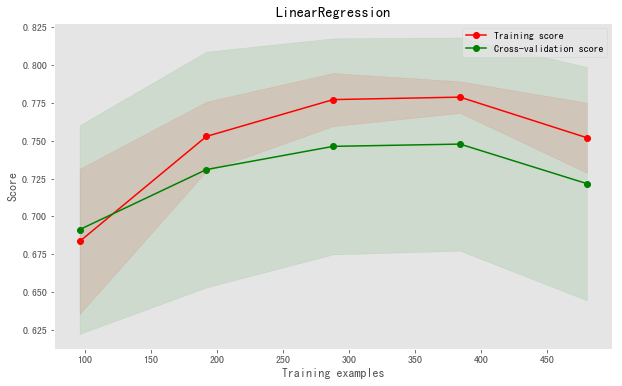

In [74]:
cv = KFold(n_splits=4, random_state=None, shuffle=True)
estimator = linear_model.LinearRegression()

sc.fit(X_train)
plot_learning_curve(estimator, "LinearRegression", sc.transform(X), y.values.ravel(), cv=cv , train_sizes=np.linspace(0.2, 1.0, 5))

## 六、多變項線性迴歸
### 6.1 切分訓練及測試資料 (2 features)

In [75]:
X = df_ml[['建物移轉總面積平方公尺','屋齡']]
y = df_ml[['總價元']]

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3) # 30% for testing, 70% for training
X_train.head()

,建物移轉總面積平方公尺,屋齡
281,74.35,49.0
500,72.76,41.0
189,230.72,5.0
69,20.17,35.0
581,89.74,10.0


### 6.1 特徵標準化 (Standardization)

In [77]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_normalized = sc.transform(X_train)
X_test_normalized = sc.transform(X_test)

### 6.2 使用Scikit-Learn LinearRegression

In [79]:
# linear regression 物件
regr = linear_model.LinearRegression()

# 訓練模型
regr.fit(X_train_normalized, y_train)

print('各變項參數:', regr.coef_)
print("MSE: %.2f" % np.mean((regr.predict(X_test_normalized) - y_test) ** 2))
print("R Square:",regr.score(X_test_normalized, y_test))

各變項參數: [[2073.90424458 -198.34458568]]
MSE: 2050169.85
R Square: 0.7475556577470708


<module 'matplotlib.pyplot' from '/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

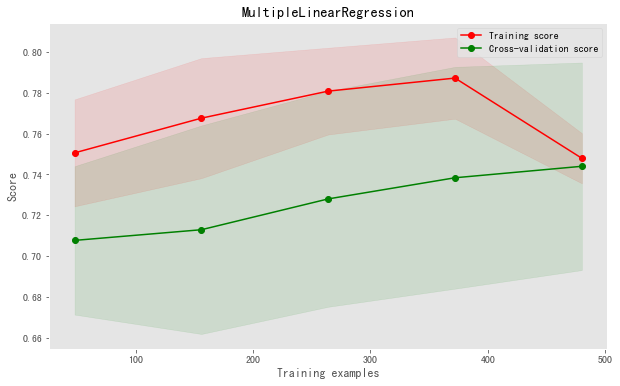

In [80]:
#cv = ShuffleSplit(n_splits=3, random_state=None, test_size=0.3)
cv = KFold(n_splits=4, random_state=None, shuffle=True)
estimator = linear_model.LinearRegression()

sc.fit(X_train)
plot_learning_curve(estimator, "MultipleLinearRegression", sc.transform(X), y.values.ravel(), cv=cv , train_sizes=np.linspace(0.1, 1.0, 5))

### 6.3 使用Scikit-Learn SGDRegressor

In [81]:
y_train_1d = y_train.values.ravel()
y_test_1d = y_test.values.ravel()

# SGD Regressor 
sgdr = linear_model.SGDRegressor(max_iter=100,learning_rate='constant',eta0=0.01)

# 訓練模型
sgdr.fit(X_train_normalized, y_train_1d)

print('各變項參數:', sgdr.coef_)
print("MSE: %.2f" % np.mean((sgdr.predict(X_test_normalized) - y_test_1d) ** 2))
print("R Square:",sgdr.score(X_test_normalized,y_test_1d))

各變項參數: [2037.25292023 -252.25309377]
MSE: 2084047.00
R Square: 0.7433842491222957


<module 'matplotlib.pyplot' from '/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

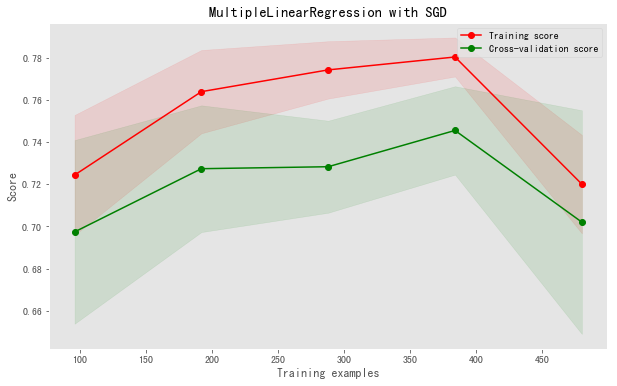

In [82]:
from sklearn.model_selection import ShuffleSplit
cv = KFold(n_splits=4, random_state=None, shuffle=True)
#cv = ShuffleSplit(n_splits=3, random_state=None, test_size=0.3)
estimator = linear_model.SGDRegressor(max_iter=1000,learning_rate='constant',eta0=0.01)

plot_learning_curve(estimator, "MultipleLinearRegression with SGD", sc.transform(X), y.values.ravel(), cv=cv , train_sizes=np.linspace(0.2, 1.0, 5))

## 七、多項式(Polynomial) 非線性迴歸
### 切分訓練及測試資料 (1 feature)

In [83]:
from sklearn.model_selection import train_test_split
X = df_ml[['建物移轉總面積平方公尺']]
y = df_ml[['總價元']]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3) # 30% for testing, 70% for training
X_train.head()

,建物移轉總面積平方公尺
462,40.85
33,112.18
512,66.08
583,95.89
450,34.80


### 創造高次方變項

各變項參數: 
 [[0.00000000e+00 1.74989987e+01 5.87833619e-03]]
MSE: 1976969.60
R Square: 0.7838314517987256


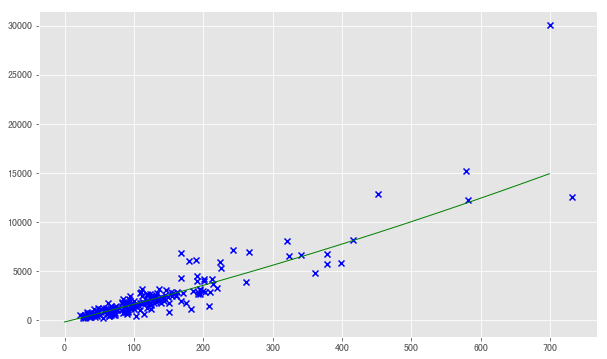

In [89]:
from sklearn.preprocessing import PolynomialFeatures

quadratic = PolynomialFeatures(degree=2)
X_train_raw = X_train.copy() #原始X_train
X_test_raw = X_test.copy() #原始X_test
X_train_poly = quadratic.fit_transform(X_train_raw) #產生x^0, x^1, x^2
X_test_poly = quadratic.fit_transform(X_test_raw) #產生x^0, x^1, x^2

# linear regression 物件
regr = linear_model.LinearRegression()

# 訓練模型
regr.fit(X_train_poly, y_train)

print('各變項參數: \n', regr.coef_)
print("MSE: %.2f" % np.mean((regr.predict(X_test_poly) - y_test) ** 2))
print("R Square:",regr.score(X_test_poly, y_test))

# Plot outputs
plt.figure(figsize=(10,6))
plt.scatter(X_test_raw['建物移轉總面積平方公尺'], y_test['總價元'],  color='blue', marker = 'x')

X_fit = pd.DataFrame(np.arange(0,700,1)) #作圖用
plt.plot(X_fit, regr.predict(quadratic.fit_transform(X_fit)), color='green', linewidth=1)


plt.show()

In [90]:
quadratic = PolynomialFeatures(degree=2)
X_raw = X.copy() #原始X_train
X_poly = quadratic.fit_transform(X_raw) #產生x^0, x^1, x^2

<module 'matplotlib.pyplot' from '/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

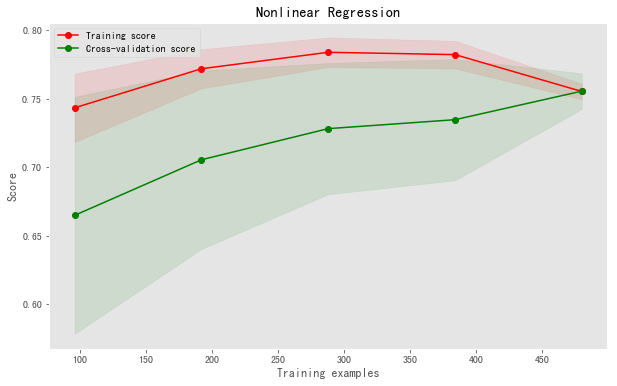

In [100]:
cv = KFold(n_splits=4, random_state=None, shuffle=True)
estimator = linear_model.LinearRegression()
plot_learning_curve(estimator, "Nonlinear Regression", X_poly, y, cv=cv,train_sizes=np.linspace(0.2, 1.0, 5))

## 補充：自造簡單線性迴歸 Gradient Descent

In [115]:
def computeCost(X, y, weight=np.array([[0,0]])):
    m = y.size
    J = 0
    h = X.dot(weight)
    J = 1/(2*m)*np.sum(np.square(h-y))
    return(J)

def gradientDescent(X, y, weight=np.array([[0,0]]), alpha=0.01, num_iters=300):
    m = y.size
    J_history = np.zeros(num_iters)
    
    for iters in np.arange(num_iters):
        h = X.dot(weight)
        weight = weight - alpha*(1/m)*(X.T.dot(h-y))
        J_history[iters] = computeCost(X, y, weight)
    return(weight, J_history)

In [116]:
X = df_ml[['建物移轉總面積平方公尺']]
y = df_ml[['總價元']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) # 30% for testing, 70% for training
X_train.head()

,建物移轉總面積平方公尺
614,126.85
580,115.18
392,195.73
608,36.77
475,265.78


In [117]:
sc.fit(X_train)
X_train_normalized = sc.transform(X_train)

weight:  [2314.95273416 2314.95273416]


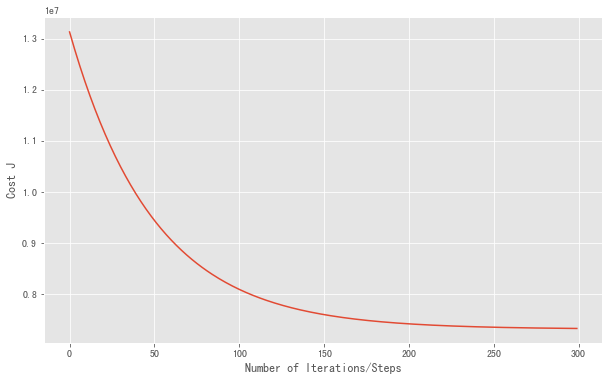

In [118]:
# theta for minimized cost J
weight , Cost_J = gradientDescent(X_train_normalized, y_train.values)

print('weight: ',weight.ravel())
plt.figure(figsize=(10,6))
plt.plot(Cost_J)
plt.ylabel('Cost J')
plt.xlabel('Number of Iterations/Steps');